<center>
<img src="https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/img/this_is_data_anal.png" width="200" height="200"><br>
</center>

## 3.3 미래에 볼 영화의 평점 예측하기


### step.1 탐색: MovieLens 데이터 살펴보기



MovieLens 데이터는 총 3개의 데이터셋으로 분리되어 있다.
각 데이터는 '::' 구분자로 열을 구분하였기 때문에 read_csv() 함수를 사용할 때 delimeter='::'파라미터를 포함해야 한다.

In [1]:
import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Source : https://grouplens.org/datasets/movielens
rating_file_path = '/home/jaeyoon89/python-data-analysis/data/ml-1m/ratings.dat'
movie_file_path = '/home/jaeyoon89/python-data-analysis/data/ml-1m/movies.dat'
user_file_path = '/home/jaeyoon89/python-data-analysis/data/ml-1m/users.dat'

rating_data = pd.io.parsers.read_csv(rating_file_path,
                                    names=['user_id', 'movie_id', 'rating', 'time'],
                                    delimiter='::')
movie_data = pd.io.parsers.read_csv(movie_file_path, 
                                    names=['movie_id', 'title', 'genre'], delimiter='::')
user_data = pd.io.parsers.read_csv(user_file_path, 
                                   names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::')

In [3]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### step.2 분석: 탐색적 데이터 분석하기


이번엔 탐색적 분석을 통해 영화 데이터를 살펴보자. 다음의 실행 결과는 영화의 갯수와 연도별 탐색에 대한 출력 결과이다.

- 분석할 영화의 정보 탐색하기

In [7]:
print("total number of movie in data:", len(movie_data['movie_id'].unique()))

movie_data['year'] = movie_data['title'].apply(lambda x:x[-5:-1])
movie_data['year'].value_counts().head(10)

total number of movie in data: 3883


1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

다음으로 영화 데이터에서 가장 많이 등장한 장르가 무엇인지를 탐색해보자.movie_data의 피처인 genre는 '드라마|코미디|액션|' 처럼 '|' 이라는 구분자를 포함하여 여러 장르를 하나의 문자열에 포함하고 있다. 따라서 데이터에 등장하는 모든 개별 장르를 세기 위해서는 split() 함수로 genre 데이터를 분리해야 한다. 각 장르마다의 등장 개수는 dictionary 자료로 저장한다.

- 장르의 속성 탐색하기

In [10]:
unique_genre_dict = {}
for index, row in movie_data.iterrows():
    
    genre_combination = row['genre']
    parsed_genre = genre_combination.split('|')
    
    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1        

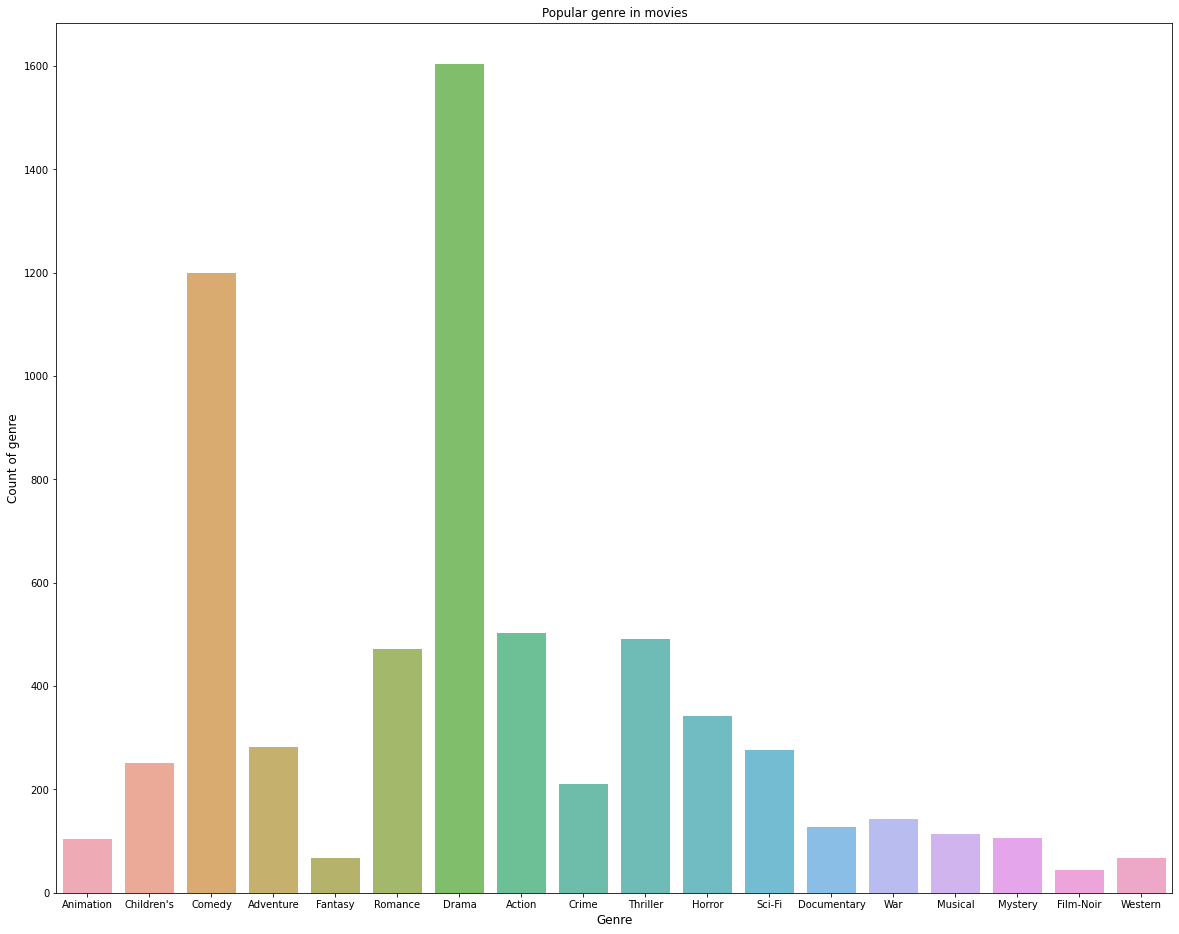

In [12]:
plt.rcParams['figure.figsize'] = [20,16]
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()),
           alpha=0.8)
plt.title('Popular genre in movies')
plt.ylabel('Count of genre', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()

그리고 분석 대상이 되는 유저의 수를 탐색해 보면 총 6040명으로 나타난다.

- 분석할 유저의 정보 탐색하기

In [14]:
print("total number of user in data :", len(user_data['user_id'].unique()))

total number of user in data : 6040


지금까지 user_data, movie_data 데이터의 특징을 살펴본 것은 '평점 예측'의 측면에서는 중요한 탐색이라고 볼 수 없다. 하지만 rating 데이터는 평점 예측 데이터 분석에 중요한 데이터이기 때문에 조금 더 자세히 탐색을 수행할 필요가 있다.

-  평점 데이터의 정보 탐색하기

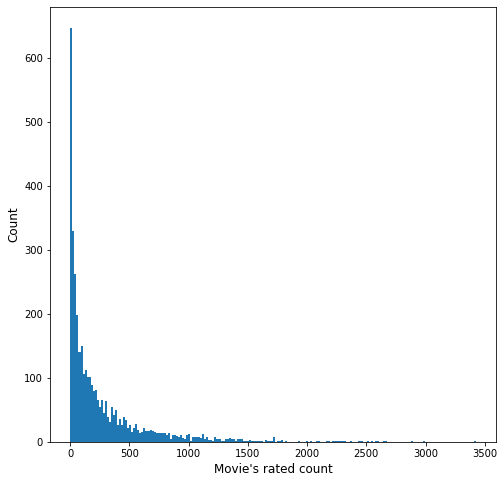

total number of movie in data : 3883
total number of movie rated below 100 : 1687


In [15]:
movie_rate_count =  rating_data.groupby('movie_id')['rating'].count().values
plt.rcParams['figure.figsize'] = [8,8]
fig = plt.hist(movie_rate_count, bins = 200)
plt.ylabel('Count', fontsize=12)
plt.xlabel("Movie's rated count", fontsize=12)
plt.show()

print("total number of movie in data :", len(movie_data['movie_id'].unique()))
print("total number of movie rated below 100 :", len(movie_rate_count[movie_rate_count<100]))